## Transfer Learning


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [133]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision

In [134]:
from sklearn.datasets import load_digits

# Load the MNIST dataset
mnist = load_digits()

# Images are already flattened (8x8 image to 64 pixels)
images = mnist.data

# Create a DataFrame with image data as columns and labels as a separate column
df = pd.DataFrame(data=images, columns=[f"pixel_{i}" for i in range(64)])
df["label"] = mnist.target

df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [135]:
Y = df['label']
Y
X = df.drop('label',axis= 1)
X

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


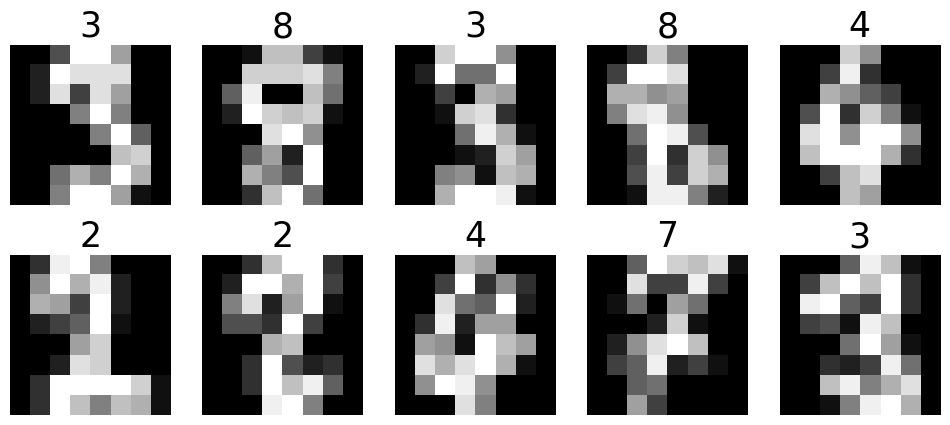

In [136]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,1797,size=10)
for i in range(10):
    axes[i].imshow(X.iloc[idx[i],:].values.reshape(8,8), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(Y[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [137]:
# Test-Train-Val Dataset Spliting.
x_t,x_test,y_t,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
x_train,x_val,y_train,y_val = train_test_split(x_t,y_t,test_size=0.2,random_state=42)

In [138]:
class CustomDataset(Dataset):
    def __init__(self,features,label):
        features = features.to_numpy()
        self.features = features.reshape(features.shape[0],1, 8, 8)   
        self.label = label
        print(self.features.shape)
    
    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self,idx):
        sample = self.features[idx]
        label = self.label.values[idx]
        sample_tensor = torch.tensor(sample,dtype = torch.float32)
        label_tensor = torch.tensor(label,dtype = torch.long)

        return sample_tensor,label_tensor

In [139]:
train_dataset = CustomDataset(x_train,y_train)
val_dataset = CustomDataset(x_val,y_val)
test_dataset = CustomDataset(x_test,y_test)

(1149, 1, 8, 8)
(288, 1, 8, 8)
(360, 1, 8, 8)


In [140]:
batch_size = 64
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cpu'

In [141]:
train_dataloader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size = batch_size,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [142]:
# loading pretrained resnet model
res = torchvision.models.resnet18(pretrained = True)

C:\Users\ARYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\ARYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [143]:
print(res)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [144]:
# setting parameters as non trainable
for param in res.parameters():
    param.requires_grad = False
    
# changing last layers 
# check layers by printing model
res.avgpool = nn.AdaptiveAvgPool2d(output_size=(2, 2))
res.fc = nn.Sequential(nn.Linear(in_features=512*4, out_features=64, bias=True),
                         nn.ReLU(),
                         nn.Linear(in_features=64, out_features=10, bias=True)
                         )
print(res)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [145]:
# adding a conv layer at start and using res after that
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN,self).__init__()
        self.c = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)  
        self.r = res
    
    def forward(self, x):
        x = self.c(x)
        x = torch.sigmoid(self.r(x))
        return x

In [146]:
model = MyCNN().to(device)
print(model)

MyCNN(
  (c): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (r): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): 

In [147]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
epochs = 100
best_loss = 1e9
patience = 5
count=0
losslst = []
vallst = []

In [174]:
for epoch in range(epochs):
    
    # Training
    model.train()  # telling model to go to training mode
    train_loss = 0
    train_count = 0
    train_pred = 0
    for data,label in train_dataloader:  #in each iteration data gets a batch from dataloader
        data,label = data.to(device),label.to(device)
        pred = model(data)
        loss = loss_func(pred,label)
        optimizer.zero_grad()  #clearing grad from prev batch
        loss.backward()  #calc grad
        optimizer.step() #update weights
        train_loss += loss.item()
        
        # pred.argmax(dim) -->gives index where the value is max accross col(if dim=0) or row(if dim=1)
        train_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
        train_count += 1

    train_loss = train_loss / train_count   # mean loss over all batches
    

  # Validation
    if epoch%5==0:
        with torch.no_grad():
            model.eval()   # telling model to go to evaluation mode
            val_loss = 0
            val_count = 0
            val_pred = 0
            for data,label in val_dataloader:
                data,label = data.to(device),label.to(device)
                pred = model(data)
                loss = loss_func(pred,label)
                val_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
                val_count += 1
                val_loss += loss.item()

            val_loss = val_loss / val_count
            vallst.append(val_loss)
            losslst.append(train_loss)
            if val_loss < best_loss:
                count = 0
                best_loss = val_loss
#                 checkpoint = {
#                     'epoch': epoch + 1,
#                     'model_state_dict': model.state_dict(),
#                     'optimizer_state_dict': optimizer.state_dict(),
#                     'loss': best_loss,
#                 }
    #             torch.save(checkpoint, f"mcheckpoint:{epoch+1}")
    #             print(f"mcheckpoint:{epoch+1}")
            else:
                count += 1
            if count == patience:
                count=0
                print("Early Stopping !!!")
                break

            print(f"{epoch+1}: train_loss = {train_loss:.7f} | val_loss = {val_loss:.7f} " )


1: train_loss = 1.6848478 | val_loss = 1.7147205 
6: train_loss = 1.6786654 | val_loss = 1.7606632 
11: train_loss = 1.6646913 | val_loss = 1.7402165 
16: train_loss = 1.6661067 | val_loss = 1.7156723 
Early Stopping !!!


In [175]:
# Put model in evaluation mode
model.eval()

# Load your test dataset
# Assuming test_dataloader is defined elsewhere in your code and loaded with test data
test_dataloader = test_dataloader

# Initialize variables to monitor test performance
test_loss = 0
correct = 0

# No gradient updates needed for testing
with torch.no_grad():
    for data, label in test_dataloader:
        data, label = data.to(device), label.to(device)
        pred = model(data)
        loss = loss_func(pred, label)
        test_loss += loss.item()
        correct += (pred.argmax(1) == label).sum().item()

# Calculate average loss and accuracy over the test set
test_loss /= len(test_dataloader.dataset)
test_accuracy = 100. * correct / len(test_dataloader.dataset)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.0288, Test Accuracy: 65.56%


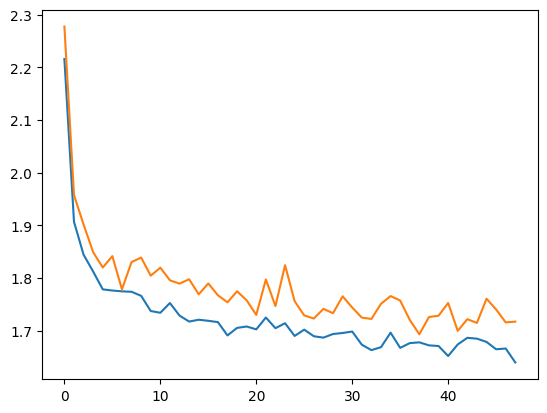

In [176]:
plt.plot(losslst)
plt.plot(vallst)
plt.show()

actual:  3
prediction: 9


tensor([[1.0140e-07, 2.0045e-07, 8.8924e-06, 9.8757e-01, 5.7202e-04, 8.6358e-03,
         9.8831e-06, 7.9884e-08, 2.2779e-06, 1.0000e+00]])

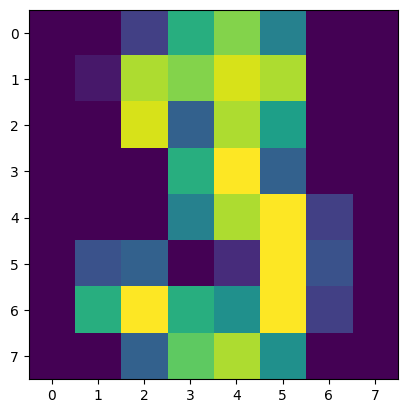

In [178]:
n = np.random.randint(0,1000)   #index
test = torch.tensor(X.iloc[n,:],dtype = torch.float32).reshape(1,-1)
test = test.reshape(1,1,8,8)
print("actual: ",Y[n])
with torch.no_grad():
    pred = model(test)
    
print("prediction:",pred.argmax(1).item())
plt.imshow(X.iloc[n,:].values.reshape(8,-1))
pred